In [1]:
import pandas as pd
import re
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
#import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('scraped_tweets_peter obi.csv')

In [4]:
df_tinu = pd.read_csv('scraped_tweets_tinubu.csv')

In [5]:
df_atiku = pd.read_csv('scraped_tweets_atiku.csv')

In [6]:
df_apc = pd.read_csv('scraped_tweets_APC.csv')

In [7]:
df_pdp = pd.read_csv('scraped_tweets_PDP.csv')

In [8]:
df_t_a_e_2 = pd.read_csv('scraped_tweets_tinubu APC election 2023.csv')

In [9]:
df_a_p_e_2 = pd.read_csv('scraped_tweets_atiku pdp election 2023.csv')

In [10]:
df2 = pd.read_csv('scraped_tweets_peter obi labour party lp election 2023.csv')

In [11]:
df3 = pd.read_csv('scraped_tweets_obidient obidatti.csv')

In [12]:
peter_obi = pd.concat([df1,df3])


In [13]:
peter_obi = pd.concat([peter_obi,df2])
peter_obi.to_csv('peter_obi.csv')

In [14]:
atiku = pd.concat([df_atiku, df_pdp])

In [15]:
atiku = pd.concat([atiku,df_a_p_e_2])
atiku.to_csv('atiku.csv')

In [16]:
tinubu = pd.concat([df_tinu,df_apc])

In [17]:
tinubu = pd.concat([tinubu,df_t_a_e_2])
tinubu.to_csv('tinubu.csv')

In [18]:
peter_obi['candidate'] = 'peter'
peter_obi

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,candidate
0,0,OzyBundee,I am a unique mixture of being laid back but i...,South Africa,2319,1793,31755,2334,"Peter Obi know the size of River Niger, River ...",peter
1,1,AjikeOmoJesu,wholeheartedly Obidient and absolutely Yusful\...,Nigeria,86,39,2247,139,Where are Agbado and Mikano boys this evening?...,peter
2,2,VICTORYCHIMEZI3,For the Amazing Love of GOD constrains me,NaN,1052,86,85,663,I will be Commander-in-Chief and I will deal w...,peter
3,3,goreehollar1,CEO of GREY CHEMICALS & FUMIGATION SERVICES \n...,NaN,906,3245,67173,461,"According to Steve of Arise News TV, lots of N...",peter
4,4,Pius55739256,"I want to do it again and again, as long as I ...","Federal Capital Territory, Nig",336,112,3418,819,"When you listen to Peter Obi, you won’t need a...",peter
...,...,...,...,...,...,...,...,...,...,...
12,12,WazobiaFMPH,Chook Mouth! 084 460 941,"Rumuosi, Port Harcourt",142,40868,32976,0,#NewsHeadlines: Joseph Faduri wey been run to ...,peter
13,13,NigeriaVotes_ng,Voter Education | Opinion Polls | Approval Rat...,Nigeria,120,174,5646,1,2023: Nobody gave me private jet for campaigns...,peter
14,14,james_swam,"A PR/advertising practitioner, former spokespe...",NaN,32,12,26,0,"Presidential candidate of Labour Party, LP, Pe...",peter
15,15,aanjuwon,The truth will set you free...,NaN,1250,1454,22394,0,Asiwaju Bola Ahmed Tinubu and that of the Labo...,peter


In [19]:
atiku['candidate'] = 'Atiku'
atiku

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,candidate
0,0,BarryDudor,NaN,NaN,61,17,704,14,I just say make i remind you to use your brain...,Atiku
1,1,mobis101,"august,20","Kellen, Texas, USA",1156,167,2599,0,@renoomokri And you graduated with what ? Pete...,Atiku
2,2,Aknloluwqmi,obanirin,🇺🇸,356,405,10307,50,Dele Momodu should provide Hope of MKO Abiola’...,Atiku
3,3,Alasela8,Proud to be a Black,"Port Harcourt, Nigeria",54,39,123,0,"@atiku Sympathy,or empathy, which ways?pass le...",Atiku
4,4,NMoviesPlanetT1,N-Movies Planet Television is the home of ever...,NaN,916,53,563,0,"Since this one lies dried up, he's so obsessed...",Atiku
...,...,...,...,...,...,...,...,...,...,...
494,494,Amb_Balemoh,Quantity Surveyor | Author | Data Analyst & Me...,"Abuja, Nigeria",475,1093,6028,20,"For this 2023 presidential election, I stand f...",Atiku
495,495,Angela201045315,I am more than a woman and I am who I am. what...,NaN,5648,5141,73547,20,"For this 2023 presidential election, I stand f...",Atiku
496,496,breakingnewsni1,Get the latest unbiased #breaking #Nigerian n...,"Abuja, Nigeria",969,527,3372,0,The Presidential candidate of the Peoples Demo...,Atiku
497,497,Nigerianey,Unbiased news/information in and around Nigeri...,Lagos Nigeria,486,8683,130788,0,"2023 polls: PDP now third force, Atiku stoking...",Atiku


In [20]:
tinubu['candidate'] = 'Tinubu'
tinubu

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,candidate
0,0,Jagunbaba,"Cool and nice fellow! Engineer, husband, fathe...","London, England",8084,9913,27247,80,If endsars wasn't particularly to end Tinubu a...,Tinubu
1,1,tae_ajet,Taciturn: The king of Poindexter•,World,204,199,2554,0,@OladapoSam01 @DeleFarotimi @toyinsubi @ezepei...,Tinubu
2,2,oat_tracy,Have you thanked God today?🙃,Home,1644,1701,145143,131,Why care about your personal income when you c...,Tinubu
3,3,Jagaban_Olu,"Political scientist, football enthusiast and l...","Lagos, Nigeria",200,53,2060,32,Obidients don't need to hate Seyi Tinubu for o...,Tinubu
4,4,thebardogbamola,Scriptwriter.\nTechnical and copywriting.\nPR....,Somewhere in Nigeria.,5160,36806,189006,4,Tinubu &amp; his group of thieves are so despe...,Tinubu
...,...,...,...,...,...,...,...,...,...,...
995,995,AsafaDauda,"Economist, Financial Analyst & Public Policy",NaN,810,199,3191,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu
996,996,Sarkin_manomi,"Budding agriculturist, investor, visionary, be...","Katsina, Nigeria.",854,155,2677,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu
997,997,segundogbey,PLM Technology Expert. Passionate about the po...,"Lagos, Nigeria",297,115,1018,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu
998,998,Centerstrit,"Politics, Opinions, Health, Entertainment & L...",Everywhere,598,577,16832,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu


In [21]:
peter_obi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 0 to 16
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1292 non-null   int64 
 1   username      1292 non-null   object
 2   description   1116 non-null   object
 3   location      924 non-null    object
 4   following     1292 non-null   int64 
 5   followers     1292 non-null   int64 
 6   totaltweets   1292 non-null   int64 
 7   retweetcount  1292 non-null   int64 
 8   text          1292 non-null   object
 9   candidate     1292 non-null   object
dtypes: int64(5), object(5)
memory usage: 111.0+ KB


In [22]:
peter_obi.location.fillna('Nigeria',inplace=True)

In [23]:
peter_obi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 0 to 16
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1292 non-null   int64 
 1   username      1292 non-null   object
 2   description   1116 non-null   object
 3   location      1292 non-null   object
 4   following     1292 non-null   int64 
 5   followers     1292 non-null   int64 
 6   totaltweets   1292 non-null   int64 
 7   retweetcount  1292 non-null   int64 
 8   text          1292 non-null   object
 9   candidate     1292 non-null   object
dtypes: int64(5), object(5)
memory usage: 111.0+ KB


In [24]:
tinubu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1317 non-null   int64 
 1   username      1317 non-null   object
 2   description   1147 non-null   object
 3   location      907 non-null    object
 4   following     1317 non-null   int64 
 5   followers     1317 non-null   int64 
 6   totaltweets   1317 non-null   int64 
 7   retweetcount  1317 non-null   int64 
 8   text          1317 non-null   object
 9   candidate     1317 non-null   object
dtypes: int64(5), object(5)
memory usage: 113.2+ KB


In [25]:
tinubu.location.fillna('Nigeria',inplace=True)

In [26]:
atiku.location.fillna('Nigeria',inplace=True)

In [27]:
data_mixed = pd.concat([peter_obi,atiku])
#data_mixed.sort_values(by='created_at')
data_mixed = pd.concat([data_mixed,tinubu])
data_mixed

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,candidate
0,0,OzyBundee,I am a unique mixture of being laid back but i...,South Africa,2319,1793,31755,2334,"Peter Obi know the size of River Niger, River ...",peter
1,1,AjikeOmoJesu,wholeheartedly Obidient and absolutely Yusful\...,Nigeria,86,39,2247,139,Where are Agbado and Mikano boys this evening?...,peter
2,2,VICTORYCHIMEZI3,For the Amazing Love of GOD constrains me,Nigeria,1052,86,85,663,I will be Commander-in-Chief and I will deal w...,peter
3,3,goreehollar1,CEO of GREY CHEMICALS & FUMIGATION SERVICES \n...,Nigeria,906,3245,67173,461,"According to Steve of Arise News TV, lots of N...",peter
4,4,Pius55739256,"I want to do it again and again, as long as I ...","Federal Capital Territory, Nig",336,112,3418,819,"When you listen to Peter Obi, you won’t need a...",peter
...,...,...,...,...,...,...,...,...,...,...
995,995,AsafaDauda,"Economist, Financial Analyst & Public Policy",Nigeria,810,199,3191,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu
996,996,Sarkin_manomi,"Budding agriculturist, investor, visionary, be...","Katsina, Nigeria.",854,155,2677,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu
997,997,segundogbey,PLM Technology Expert. Passionate about the po...,"Lagos, Nigeria",297,115,1018,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu
998,998,Centerstrit,"Politics, Opinions, Health, Entertainment & L...",Everywhere,598,577,16832,1266,RENEWED HOPE - Asiwaju Bola Tinubu’s Action Pl...,Tinubu


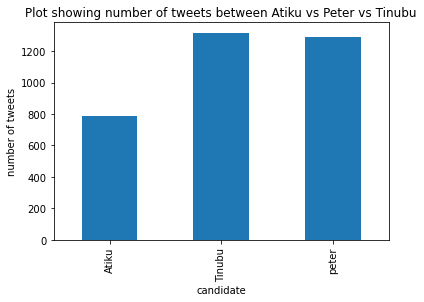

In [28]:
# check the number of tweets recieved for each of them
data_mixed.groupby('candidate')['text'].count().plot.bar()
plt.ylabel('number of tweets')
plt.title('Plot showing number of tweets between Atiku vs Peter vs Tinubu')
plt.show()

In [29]:
data_mixed.location.value_counts()

Nigeria                           1415
Lagos, Nigeria                     317
Abuja, Nigeria                      87
Lagos                               49
Federal Capital Territory, Nig      44
                                  ... 
Heaven                               1
Rochdale, 🇬🇧 England                 1
Somolu Lagos                         1
Heart of the city                    1
Middle of Nowhere                    1
Name: location, Length: 747, dtype: int64

In [30]:
data_mixed['location']= data_mixed['location'].replace({"Lagos, Nigeria":"Nigeria","Federal Capital Territory, Nig":"Nigeria","Abuja, Nigeria":"Nigeria", "Lagos Nigeria":"Nigeria","Kaduna, Nigeria":"Nigeria","Lagos":"Nigeria","Abuja":"Nigeria","Abuja,nigeria":"Nigeria","Abuja / Kebbi / Lagos":"Nigeria","Onicha, Ebonyi":"Nigeria"})

In [31]:
data_mixed.location.value_counts()

Nigeria                       1979
Africa                          32
Earth                           28
Global Citizen                  25
🌟 STARBOY 🌹                     23
                              ... 
Blue Earth, MN                   1
Abuja Nigeria, Rome Italy.       1
Your heart                       1
Jamaica                          1
Middle of Nowhere                1
Name: location, Length: 737, dtype: int64

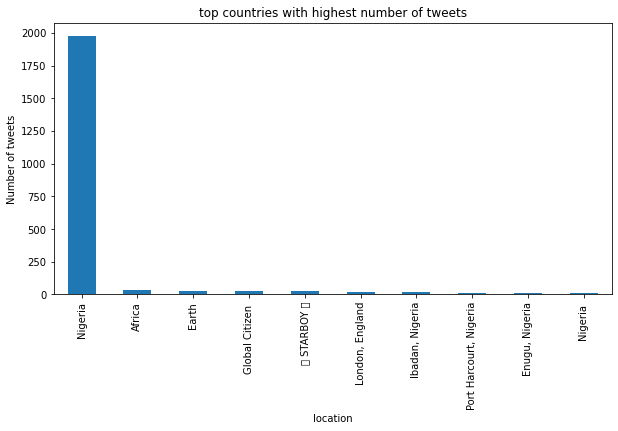

In [32]:
# countries with highest number of tweets
plt.figure(figsize=(10,5))
data_mixed.groupby('location')['text'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of tweets')
plt.title('top countries with highest number of tweets')
plt.show()

# Sentiment analysis of presidential elections

In [33]:
lm = WordNetLemmatizer()

In [34]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text

In [35]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score <0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

# Peter Obi tweets sentiment analysis

In [36]:
peter_obi.location.fillna('Nigeria',inplace=True)

In [37]:
peter_obi = data_mixed.query('(candidate == "peter")').sort_values('followers',ascending=False).drop_duplicates(['username','text'])[['text','location']]
peter_obi = peter_obi.dropna().loc[peter_obi.location =='Nigeria']
peter_obi.reset_index(inplace = True ,drop =True)

In [38]:
peter_obi

,text,location
0,Reuben Abati’s question to Peter obi pertainin...,Nigeria
1,Gist 101: A thread 👇\nSo I was in this Salon e...,Nigeria
2,Peter Obi in 2010 was ICT Governor of the Year...,Nigeria
3,This is how you can convince me to vote for yo...,Nigeria
4,Banking halls in Nigeria became football viewi...,Nigeria
...,...,...
743,On my watch those who steal government money w...,Nigeria
744,This brought tears to my eyes. I think Peter O...,Nigeria
745,"‘If You Put A Gun To My Head, I Won’t Reveal H...",Nigeria
746,"‘If You Put A Gun To My Head, I Won’t Reveal H...",Nigeria


In [39]:
peter_obi['cleantext'] = peter_obi['text'].apply(clean)

In [40]:
peter_obi['subjectivity'] = peter_obi['cleantext'].apply(getsubjectivity)

In [41]:
peter_obi['polarity'] = peter_obi['cleantext'].apply(getpolarity)

In [42]:
peter_obi['analysis'] = peter_obi['polarity'].apply(getAnalysis)

In [43]:
peter_obi

,text,location,cleantext,subjectivity,polarity,analysis
0,Reuben Abati’s question to Peter obi pertainin...,Nigeria,reuben abati question peter obi pertaining pri...,0.241667,0.116667,positive
1,Gist 101: A thread 👇\nSo I was in this Salon e...,Nigeria,gist thread salon earlier today playing petero...,0.250000,0.000000,neutral
2,Peter Obi in 2010 was ICT Governor of the Year...,Nigeria,peter obi ict governor year west africa ict de...,0.000000,0.000000,neutral
3,This is how you can convince me to vote for yo...,Nigeria,convince vote candidate fkeyamo bring party ma...,0.000000,0.000000,neutral
4,Banking halls in Nigeria became football viewi...,Nigeria,banking hall nigeria became football viewing c...,0.100000,-0.100000,negative
...,...,...,...,...,...,...
743,On my watch those who steal government money w...,Nigeria,watch steal government money meet bargain pete...,0.000000,0.000000,neutral
744,This brought tears to my eyes. I think Peter O...,Nigeria,brought tear eye think peter obi decision issu...,0.650000,0.275000,positive
745,"‘If You Put A Gun To My Head, I Won’t Reveal H...",Nigeria,put gun head reveal going deal insecurity nige...,0.000000,0.000000,neutral
746,"‘If You Put A Gun To My Head, I Won’t Reveal H...",Nigeria,put gun head reveal going deal insecurity nige...,0.000000,0.000000,neutral


In [44]:
peter_obi.analysis.value_counts(normalize=True)*100

positive    39.304813
negative    35.427807
neutral     25.267380
Name: analysis, dtype: float64

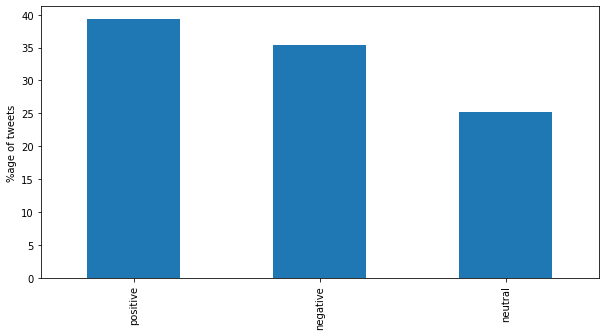

In [45]:
#Plot graph for analysis of trump tweets
plt.figure(figsize=(10,5))
(peter_obi.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

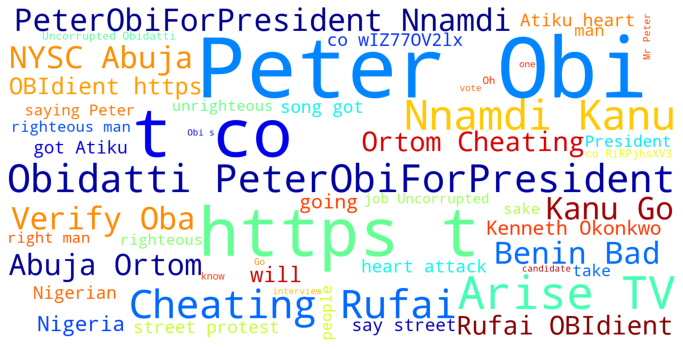

In [46]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color='white',
                         stopwords= stopwords,
                         width = 1600,height=800,
                         random_state=1,
                         colormap='jet',
                         max_words=50,
                         max_font_size=200).generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(peter_obi['text'][:1000])

# Atiku sentiment analysis

In [47]:
atiku = data_mixed.query('(candidate == "Atiku")').sort_values('followers',ascending=False).drop_duplicates(['username','text'])[['text','location']]
atiku = atiku.dropna().loc[atiku.location =='Nigeria']
atiku.reset_index(inplace = True ,drop =True)

In [48]:
atiku

,text,location
0,"Atiku Abubakar, the presidential candidate of ...",Nigeria
1,"2023: Don't trust Fayose, PDP group tells Atik...",Nigeria
2,PDP: Stakes in 2023 election are high - Atiku ...,Nigeria
3,PDP: Stakes in 2023 election are high – Atiku ...,Nigeria
4,"Atiku Back from France, Set for Edo Rally Toda...",Nigeria
...,...,...
441,"@u_uzah @PO_GrassRootM Grassroots electorates,...",Nigeria
442,"Just broke my heart. Bad governance did this, ...",Nigeria
443,@renoomokri Nigerians should watch Atiku. Imme...,Nigeria
444,"2023 ELECTION, ATIKU SUPPORT 85,000 HAS BEEN A...",Nigeria


In [49]:
atiku['cleantext'] = atiku['text'].apply(clean)

In [50]:
atiku['subjectivity'] = atiku['cleantext'].apply(getsubjectivity)

In [51]:
atiku['polarity'] = atiku['cleantext'].apply(getpolarity)

In [52]:
atiku['analysis'] = atiku['polarity'].apply(getAnalysis)

In [53]:
atiku.analysis.value_counts(normalize=True)*100

positive    42.152466
neutral     39.013453
negative    18.834081
Name: analysis, dtype: float64

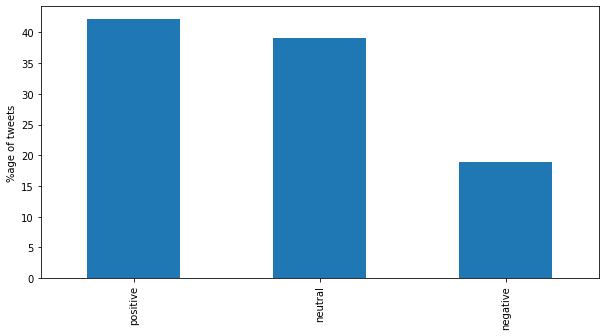

In [54]:
#Plot graph for analysis of trump tweets
plt.figure(figsize=(10,5))
(atiku.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

# Tinubu Sentiment Analysis

In [55]:
tinubu = data_mixed.query('(candidate == "Tinubu")').sort_values('followers',ascending=False).drop_duplicates(['username','text'])[['text','location']]
tinubu = tinubu.dropna().loc[tinubu.location =='Nigeria']
tinubu.reset_index(inplace = True ,drop =True)

In [56]:
tinubu['cleantext'] = tinubu['text'].apply(clean)

In [57]:
tinubu['subjectivity'] = tinubu['cleantext'].apply(getsubjectivity)

In [58]:
tinubu['polarity'] = tinubu['cleantext'].apply(getpolarity)

In [59]:
tinubu['analysis'] = tinubu['polarity'].apply(getAnalysis)

In [60]:
tinubu.analysis.value_counts(normalize=True)*100

positive    82.352941
neutral      9.281046
negative     8.366013
Name: analysis, dtype: float64

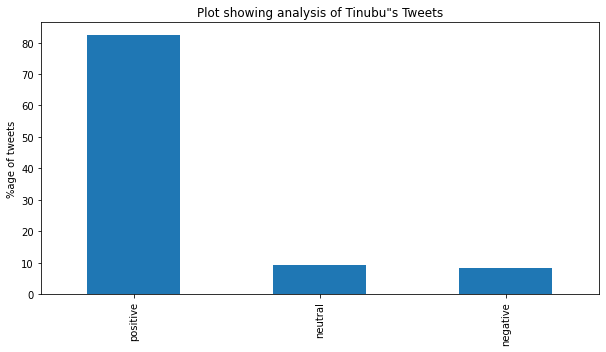

In [61]:
#Plot graph for analysis of Tinubu tweets
plt.figure(figsize=(10,5))
(tinubu.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.title('Plot showing analysis of Tinubu"s Tweets')
plt.show()

According to sentiment analysis Tinubu has upper hand over Atiku and Peter Obi in Nigeria which actually matters in presidential elections.